# Pythagorean Expectation in Eredivise Women

Pythagorean Expectation

The Pythagorean Expectation is calculated based on the goals a team scores and concedes. The formula is:

Pythagorean Expectation= Goals Scored^2+Goals Conceded^2 / Goals Scored^2


This metric provides an estimate of a team's expected wins, independent of luck or other factors. A high value indicates that the team is efficient at scoring goals and preventing opponents from scoring.
Winning Percentage

The winning percentage is calculated as follows:

Winning Percentage= Number of Wins/ Total Number of Games ×100

This metric shows the actual percentage of games a team has won.

In [1]:
# Load the packages

import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data. 
# Our data covers the 2023/2024 season

Eredivise = pd.read_excel(r'C:\Users\theod\Desktop\EREDIVISIE\EREDIVISIE VROUWEN.xlsx')
ErediviseHA = pd.read_excel(r'C:\Users\theod\Desktop\EREDIVISIE\EREDIVISIE VROUWEN.xlsx',sheet_name='HomeAway')
(ErediviseHA.columns.tolist())


['Rk',
 'Squad',
 'H-MP',
 'H-W',
 'H-D',
 'H-L',
 'H-GF',
 'H-GA',
 'H-GD',
 'H-Pts',
 'H-Pts/MP',
 'A-MP ',
 'A-W',
 'A-D',
 'A-L',
 'A-GF',
 'A-GA',
 'A-GD',
 'A-Pts',
 'A-Pts/MP']

In [3]:
Eredivisestats = pd.read_excel(r'C:\Users\theod\Desktop\EREDIVISIE\Combined_Scores_Fixtures.xlsx')

In [4]:
# Sum the results by home and away measures to get the team overall performance for the season

ErediviseHA['W'] = ErediviseHA['H-W']+ErediviseHA['A-W']
ErediviseHA['G'] = ErediviseHA['H-MP']+ErediviseHA['A-MP ']
ErediviseHA['GF'] = ErediviseHA['H-GF']+ErediviseHA['A-GF']
ErediviseHA['GA'] = ErediviseHA['H-GA']+ErediviseHA['A-GA']
ErediviseHA

,Rk,Squad,H-MP,H-W,H-D,H-L,H-GF,H-GA,H-GD,H-Pts,...,A-L,A-GF,A-GA,A-GD,A-Pts,A-Pts/MP,W,G,GF,GA
0,1,Twente,11,10,0,1,28,12,16,30,...,1,28,9,19,26,2.36,18,22,56,21
1,2,Ajax,11,8,2,1,32,9,23,26,...,1,30,11,19,28,2.55,17,22,62,20
2,3,PSV,11,8,2,1,36,10,26,26,...,4,16,14,2,15,1.36,12,22,52,24
3,4,Fortuna Sittard,11,7,1,3,26,14,12,22,...,3,31,13,18,18,1.64,12,22,57,27
4,5,ADO Den Haag,11,5,2,4,18,12,6,17,...,4,13,11,2,15,1.36,9,22,31,23
5,6,Zwolle,11,5,2,4,17,21,-4,17,...,5,19,20,-1,14,1.27,9,22,36,41
6,7,FC Utrecht,11,4,3,4,17,22,-5,15,...,4,17,23,-6,15,1.36,8,22,34,45
7,8,Feyenoord Vrouwen,11,4,2,5,14,14,0,14,...,7,12,20,-8,10,0.91,7,22,26,34
8,9,VV Alkmaar,11,1,5,5,13,18,-5,8,...,6,15,20,-5,13,1.18,5,22,28,38
9,10,Heerenveen,11,3,2,6,5,13,-8,11,...,7,10,25,-15,8,0.73,5,22,15,38


In [5]:
# Create the win percentage and Pythagorean Expectation

ErediviseHA['wpc'] = ErediviseHA['W']/ErediviseHA['G']
ErediviseHA['pyth'] = ErediviseHA['GF']**2/(ErediviseHA['GF']**2 + ErediviseHA['GA']**2)
ErediviseHA

,Rk,Squad,H-MP,H-W,H-D,H-L,H-GF,H-GA,H-GD,H-Pts,...,A-GA,A-GD,A-Pts,A-Pts/MP,W,G,GF,GA,wpc,pyth
0,1,Twente,11,10,0,1,28,12,16,30,...,9,19,26,2.36,18,22,56,21,0.818182,0.876712
1,2,Ajax,11,8,2,1,32,9,23,26,...,11,19,28,2.55,17,22,62,20,0.772727,0.905749
2,3,PSV,11,8,2,1,36,10,26,26,...,14,2,15,1.36,12,22,52,24,0.545455,0.824390
3,4,Fortuna Sittard,11,7,1,3,26,14,12,22,...,13,18,18,1.64,12,22,57,27,0.545455,0.816742
4,5,ADO Den Haag,11,5,2,4,18,12,6,17,...,11,2,15,1.36,9,22,31,23,0.409091,0.644966
5,6,Zwolle,11,5,2,4,17,21,-4,17,...,20,-1,14,1.27,9,22,36,41,0.409091,0.435338
6,7,FC Utrecht,11,4,3,4,17,22,-5,15,...,23,-6,15,1.36,8,22,34,45,0.363636,0.363408
7,8,Feyenoord Vrouwen,11,4,2,5,14,14,0,14,...,20,-8,10,0.91,7,22,26,34,0.318182,0.368996
8,9,VV Alkmaar,11,1,5,5,13,18,-5,8,...,20,-5,13,1.18,5,22,28,38,0.227273,0.351885
9,10,Heerenveen,11,3,2,6,5,13,-8,11,...,25,-15,8,0.73,5,22,15,38,0.227273,0.134811


<Figure size 1400x1000 with 0 Axes>

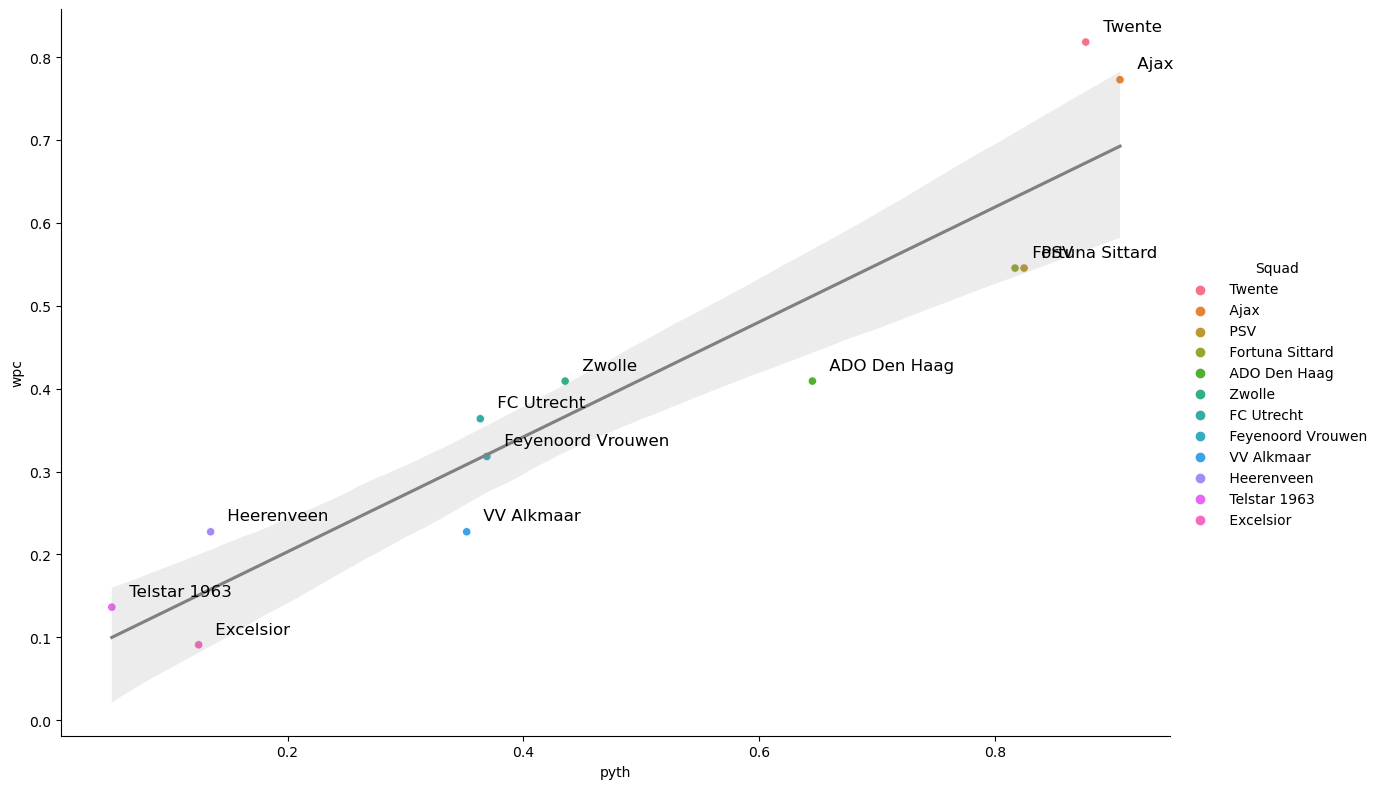

In [6]:
# Plot the data
# Seaborn allow us to color code teams 

plt.figure(figsize=(14, 10))

sns.relplot(x="pyth", y="wpc", data =ErediviseHA,hue='Squad', height=8, aspect=1.5)
sns.regplot(x="pyth", y="wpc", data=ErediviseHA, scatter=False, color='gray')

# Iterate over the data points and add annotations
for i in range(ErediviseHA.shape[0]):
    plt.text(ErediviseHA['pyth'][i] + 0.01, ErediviseHA['wpc'][i] + 0.01, 
             ErediviseHA['Squad'][i], fontsize=12, ha='left', va='bottom')

# THE ANALYSIS

Let's perform an analysis for each team in the Eredivisie Women for the 2023-2024 season based on the plot provided, which shows the relationship between Pythagorean Expectation (x-axis) and Winning Percentage (y-axis).
Analysis of Teams:

Twente

    Pythagorean Expectation: High
    Winning Percentage: Very High
    Analysis: Twente is performing exceptionally well, both in terms of their Pythagorean Expectation and their actual winning percentage. This suggests that they are not only scoring well but also effectively preventing their opponents from scoring.

Ajax

    Pythagorean Expectation: High
    Winning Percentage: Very High
    Analysis: Similar to Twente, Ajax also shows a very strong performance. Their high Pythagorean Expectation and winning percentage indicate they are one of the top teams, excelling both offensively and defensively.

PSV

    Pythagorean Expectation: Moderate
    Winning Percentage: High
    Analysis: PSV is performing better than what their Pythagorean Expectation would predict, indicating they might have had some favorable outcomes or efficient gameplay not fully captured by their goal statistics.

Fortuna Sittard

    Pythagorean Expectation: Moderate
    Winning Percentage: Moderate to High
    Analysis: Fortuna Sittard's performance aligns closely with their Pythagorean Expectation, suggesting their results are fairly consistent with their goal-scoring and defending capabilities.

ADO Den Haag

    Pythagorean Expectation: Moderate
    Winning Percentage: Moderate
    Analysis: ADO Den Haag's performance is consistent with their Pythagorean Expectation. They are a middle-of-the-pack team, performing as expected based on their goal statistics.

Zwolle

    Pythagorean Expectation: Moderate
    Winning Percentage: Moderate
    Analysis: Zwolle is performing as expected. They have a balanced performance without significant deviations from their Pythagorean Expectation.

FC Utrecht

    Pythagorean Expectation: Low to Moderate
    Winning Percentage: Moderate
    Analysis: FC Utrecht's winning percentage is slightly higher than their Pythagorean Expectation, indicating some overperformance relative to their goals scored and conceded.

Feyenoord Vrouwen

    Pythagorean Expectation: Low to Moderate
    Winning Percentage: Moderate
    Analysis: Feyenoord Vrouwen are performing close to their Pythagorean Expectation, suggesting their results align well with their goal-scoring and defending statistics.

VV Alkmaar

    Pythagorean Expectation: Low
    Winning Percentage: Low to Moderate
    Analysis: VV Alkmaar's performance is slightly below average. They are consistent with their Pythagorean Expectation, indicating a need for improvement in both scoring and defense.

Heerenveen

    Pythagorean Expectation: Low
    Winning Percentage: Low
    Analysis: Heerenveen is performing as expected based on their low Pythagorean Expectation. They need to improve their overall performance to move up in the standings.

Telstar 1963

    Pythagorean Expectation: Very Low
    Winning Percentage: Low
    Analysis: Telstar 1963 is one of the weaker teams, with both low Pythagorean Expectation and winning percentage. Significant improvements are needed to enhance their performance.

Excelsior

    Pythagorean Expectation: Very Low
    Winning Percentage: Very Low
    Analysis: Excelsior is performing at the bottom of the league. Their low Pythagorean Expectation and winning percentage suggest major challenges in both scoring and defending.

General Observations

    Teams like Twente and Ajax are excelling and outperforming expectations, showcasing their dominance in the league.
    Teams such as Telstar 1963 and Excelsior need significant improvements to become competitive.
    Mid-tier teams like ADO Den Haag and Zwolle are performing as expected, indicating a balanced but not outstanding performance.

This analysis helps to understand each team's standing and performance relative to their expected outcomes based on goal statistics, providing insights into areas of strength and those needing improvement.

In [7]:
ErediviseHA.describe()

,Rk,H-MP,H-W,H-D,H-L,H-GF,H-GA,H-GD,H-Pts,H-Pts/MP,...,A-GA,A-GD,A-Pts,A-Pts/MP,W,G,GF,GA,wpc,pyth
count,12.000000,12.0,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,...,12.000000,12.000000,12.000000,12.000000,12.000000,12.0,12.000000,12.000000,12.000000,12.000000
mean,6.500000,11.0,4.916667,2.083333,4.000000,19.000000,17.083333,1.916667,16.833333,1.530833,...,19.000000,-1.916667,14.083333,1.272500,8.916667,22.0,36.083333,36.083333,0.405303,0.491556
std,3.605551,0.0,2.810963,1.240112,2.215647,9.458041,8.195989,15.518074,7.685090,0.697599,...,7.591862,15.114462,7.609305,0.704416,5.089353,0.0,16.686730,14.681208,0.231334,0.311890
min,1.000000,11.0,1.000000,0.000000,1.000000,5.000000,9.000000,-29.000000,7.000000,0.640000,...,9.000000,-24.000000,2.000000,0.100000,2.000000,22.0,15.000000,20.000000,0.090909,0.051027
25%,3.750000,11.0,2.750000,1.750000,2.500000,12.750000,12.000000,-5.750000,10.500000,0.955000,...,12.500000,-9.750000,9.500000,0.865000,5.000000,22.0,24.500000,23.750000,0.227273,0.297617
50%,6.500000,11.0,4.500000,2.000000,4.000000,17.000000,14.000000,-2.000000,16.000000,1.455000,...,20.000000,-3.000000,14.500000,1.315000,8.500000,22.0,32.500000,36.000000,0.386364,0.402167
75%,9.250000,11.0,7.250000,2.250000,5.250000,26.500000,21.000000,13.000000,23.000000,2.090000,...,23.500000,6.000000,15.750000,1.430000,12.000000,22.0,53.000000,42.000000,0.545455,0.818654
max,12.000000,11.0,10.000000,5.000000,8.000000,36.000000,39.000000,26.000000,30.000000,2.730000,...,32.000000,19.000000,28.000000,2.550000,18.000000,22.0,62.000000,69.000000,0.818182,0.905749


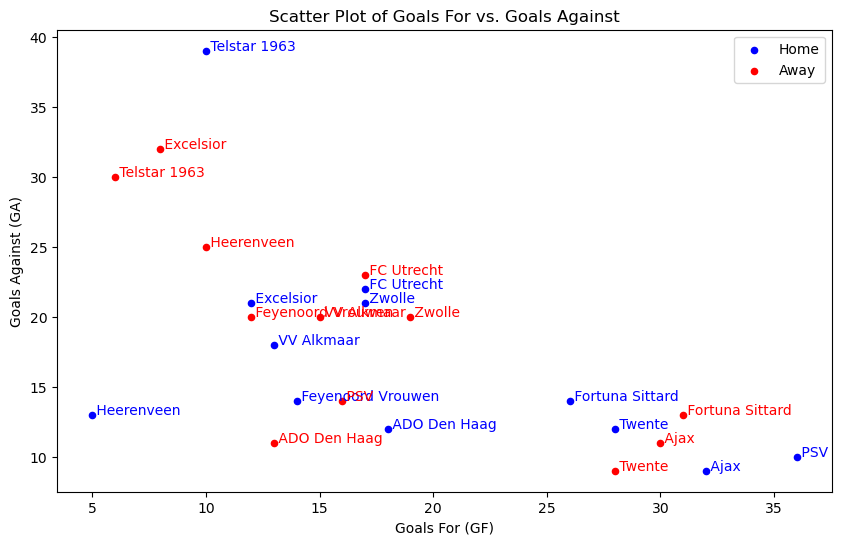

In [10]:
# Create the scatter plot for Home Goals
ax = ErediviseHA.plot.scatter(x='H-GF', y='H-GA', color='blue', label='Home', figsize=(10, 6))

# Add team names for Home Goals
for i, squad in enumerate(ErediviseHA['Squad']):
    ax.annotate(squad, (ErediviseHA['H-GF'][i], ErediviseHA['H-GA'][i]), color='blue')

# Add data for Away Goals in the same plot
ErediviseHA.plot.scatter(x='A-GF', y='A-GA', color='red', label='Away', ax=ax)

# Add team names for Away Goals
for i, squad in enumerate(ErediviseHA['Squad']):
    ax.annotate(squad, (ErediviseHA['A-GF'][i], ErediviseHA['A-GA'][i]), color='red')

# Add labels and title
plt.xlabel('Goals For (GF)')
plt.ylabel('Goals Against (GA)')
plt.title('Scatter Plot of Goals For vs. Goals Against')
plt.legend()
plt.show()

# Analysis of Teams

Twente

    Home Performance: High goals scored and low goals conceded.
    Away Performance: Similar strong performance.
    Analysis: Twente shows consistency in both home and away games, indicating a well-rounded team capable of scoring and defending effectively in different settings.

Ajax

    Home Performance: High goals scored and low goals conceded.
    Away Performance: Similar strong performance.
    Analysis: Ajax, like Twente, demonstrates strong performance both at home and away, showcasing their dominance and balanced gameplay.

PSV

    Home Performance: High goals scored and very low goals conceded.
    Away Performance: High goals scored and low goals conceded.
    Analysis: PSV is particularly strong in their defensive play, especially at home, making them a formidable team.

Fortuna Sittard

    Home Performance: High goals scored and moderate goals conceded.
    Away Performance: High goals scored and moderate goals conceded.
    Analysis: Fortuna Sittard has a potent offense but could improve defensively to convert more matches into wins.

ADO Den Haag

    Home Performance: Moderate goals scored and low goals conceded.
    Away Performance: Moderate goals scored and moderate goals conceded.
    Analysis: ADO Den Haag has a solid defense, especially at home, but needs to enhance their attacking capabilities to improve overall performance.

Zwolle

    Home Performance: Moderate goals scored and moderate goals conceded.
    Away Performance: Moderate goals scored and moderate goals conceded.
    Analysis: Zwolle is consistent in their performance, but they need to improve both offensively and defensively to climb higher in the standings.

FC Utrecht

    Home Performance: Moderate goals scored and moderate goals conceded.
    Away Performance: Moderate goals scored and moderate goals conceded.
    Analysis: FC Utrecht mirrors Zwolle's performance and needs similar improvements to become more competitive.

Feyenoord Vrouwen

    Home Performance: Moderate goals scored and low goals conceded.
    Away Performance: Moderate goals scored and moderate goals conceded.
    Analysis: Feyenoord Vrouwen's defense at home is commendable, but they need to bolster their offensive play.

VV Alkmaar

    Home Performance: Low goals scored and moderate goals conceded.
    Away Performance: Low goals scored and moderate goals conceded.
    Analysis: VV Alkmaar struggles offensively and needs significant improvement to become more competitive.

Heerenveen

    Home Performance: Low goals scored and moderate goals conceded.
    Away Performance: Low goals scored and high goals conceded.
    Analysis: Heerenveen's away performance is particularly weak, indicating a need for defensive improvements when playing away.

Telstar 1963

    Home Performance: Very low goals scored and very high goals conceded.
    Away Performance: Very low goals scored and very high goals conceded.
    Analysis: Telstar 1963 is the weakest team, struggling both offensively and defensively. Major improvements are needed across the board.

Excelsior

    Home Performance: Very low goals scored and high goals conceded.
    Away Performance: Very low goals scored and high goals conceded.
    Analysis: Excelsior is also among the weaker teams, needing comprehensive improvements in both attacking and defending.

General Observations

    General Observations

    Top Teams (Twente, Ajax, PSV): These teams are strong both at home and away, indicating robust overall performance.
    Mid-Tier Teams (Fortuna Sittard, ADO Den Haag, Zwolle, FC Utrecht, Feyenoord Vrouwen): These teams show potential but need to address specific weaknesses to become top contenders.
    Lower-Tier Teams (VV Alkmaar, Heerenveen, Telstar 1963, Excelsior): These teams face significant challenges and need substantial improvements to compete more effectively.

This scatter plot and analysis provide a comprehensive view of each team's strengths and weaknesses in terms of goals scored and conceded, offering insights into their overall performance in the league.

In [11]:
ErediviseHA['A-GA'].corr(ErediviseHA['H-GA'])

0.7290514624442318

Correlation Analysis

The correlation coefficient between the number of goal difference and home and away points made is 0.729 so there is a positive correlation between the two.

Teams that tend to concede many goals away from home also usually concede many goals at home. This may be due to defensive weaknesses that are consistent both at home and away.
It may also indicate that the same defensive strategies or approaches used by teams, regardless of whether they are playing at home or away, result in a similar degree of conceding goals.

The strong positive correlation between the goals conceded by teams at home and away shows that their defensive performances are relatively stable regardless of the venue of the match. This can be an important insight for coaches and analysts when examining defensive strategies and tactics. Additionally, it may suggest that defensive improvements or weaknesses are independent of the venue and should be addressed with a comprehensive approach.


In [13]:
ErediviseHA['A-GF'].corr(ErediviseHA['H-GF'])

0.7341259856797553

Correlation Analysis

The correlation coefficient between away goals for (A-GF) and home goals for (H-GF) in the Eredivisie Women league is approximately r=0.73r=0.73.
Interpretation

The correlation coefficient value of 0.73 indicates a strong positive correlation between the number of goals scored away (A-GF) and the number of goals scored at home (H-GF). This means that teams that score many goals at home also tend to score many goals away, although the correlation is not perfect. The strong positive correlation suggests that goal-scoring ability is somewhat consistent for teams regardless of whether they are playing at home or away, but other factors (such as differing home and away tactics, crowd support, travel fatigue, etc.) might still influence the goal-scoring outcomes.